In [200]:
#importo il dataset:

from sklearn import datasets
from sklearn.datasets import load_breast_cancer
data, target = load_breast_cancer(return_X_y=True, as_frame=True)

In [201]:
#l'importazione mi ha restituito nella variabile data la tabella con i 30 attributi
#data è di tipo pandas.core.frame.DataFrame

#data

In [202]:
#l'importazione mi ha anche restituito nella variabile target l'attributo binario che indica benigno/maligno
#target è di tipo pandas.core.series.Series

#target

In [203]:
#inserisco una colonna con l'attributo target nel mio dataframe e lo chiamo data0

data0 = data
data0.insert(0, 'target', target)
#data0

In [204]:
#visualizzo la struttura del mio dataframe solo perché ho capito come si fa, finalmente


#data0.info()

In [205]:
#conto i dati che hanno 1 e quelli che hanno 0
#in base alla descrizione del dataset ora so che quelli a 1 sono benigni e quelli a 0 sono maligni

target.value_counts()

1    357
0    212
Name: target, dtype: int64

In [206]:
#importo le librerie necessarie per fare il parallel plot

import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

In [207]:
#costruisco il parallel plot dandogli il dataframe data0
#scelgo l'attributo target come classe su cui fare il plot
#scelgo i colori delle linee (2 perchè attributo binario)
#imposto attributo alpha (trasparenza delle linee)
#plt.style.use('default')
#parallel_coordinates(data0, 'target',
#                     color=['red', 'grey'],
#                     alpha=0.3)


#metto le label dell'asse x in verticale affinché siano leggibili
#plt.xticks(rotation=90)

#imposto la grandezza della figura
#plt.rc('figure', figsize=(15.0, 5.0))

#metto il titolo al grafico
#plt.title("Breast Cancer Attributes Parallel Plot")

#mostro il grafico
#plt.show()

In [208]:
#PROVE CON ALTRI PLOT
#estraggo dal dataframe un paio di attributi da plottare e li inserisco in due variabili

m_rad = data0['mean radius']
m_area = data0['mean area']

#le variabili mi ritornano di tipo pandas.core.series.Series
#recasto a lista per poterle plottare

m_rad = list(m_rad)
m_area = list(m_area)

In [209]:
#faccio una prova mettendo in un barchart le due variabili

#plt.bar(m_rad, m_area, width= 0.1)
#plt.show()

In [210]:
#faccio un'altra prova con uno scatter plot

#plt.scatter(m_rad, m_area, c='green') #ho provato a cambiare colore al grafico
#plt.rc('figure', figsize=(15.0, 5.0)) #da qui in poi le figure avranno questa grandezza se non cambio 
#plt.show()

In [211]:
#provo a fare uno scatter plot direttamente dal dataframe

#data0.plot.scatter('mean radius', 'mean area')
#plt.show()

In [212]:
#provo a fare uno scatter plot 
#guardando rispetto all'attributo target come si comporta l'attributo worst area
#poiché era stato messo in risalto nel parallel plot

#data0.plot.scatter('worst area', 'target')
#plt.show()

In [213]:
#creo una funzione per colorare i dati in base all'attributo target

def pltcolor(classe):
    cols=[]
    for c in classe:
        if c==0:
            cols.append('red')
        else:
            cols.append('green')
    return cols


#creo la lista dei colori con la funzione sopra
cols=pltcolor(list(target))

#data0.plot.scatter('worst area', 'mean area', c=cols, alpha=0.3)
#plt.rc('figure', figsize=(10.0, 10.0))
#plt.grid(True)
#plt.show()

In [214]:
#import pandas as pd
#import plotly.express as px

In [215]:
maligno = target[target==0]
benigno = target[target==1]

In [216]:
m_id = list(maligno.index)
b_id = list(benigno.index)

In [217]:
#focus del parallel plot 

#parallel_coordinates(data0, 'target',
#                     cols = ['mean radius','worst area', 'area error', 'mean area'],
#                     color=['red', 'grey'],
#                     alpha=0.3,)


#metto le label dell'asse x in verticale affinché siano leggibili
#plt.xticks(rotation=90)

#imposto la grandezza della figura
#plt.rc('figure', figsize=(10.0, 10.0))

#metto il titolo al grafico
#plt.title("Breast Cancer Attributes Parallel Plot")

#mostro il grafico
#plt.show()

In [218]:
#altro focus sul parallel plot

#parallel_coordinates(data0, 'target',
#                     cols = ['mean radius','mean texture', 'mean perimeter', 'area error'],
#                     color=['red', 'grey'],
#                     alpha=0.3,)


#metto le label dell'asse x in verticale affinché siano leggibili
#plt.xticks(rotation=90)

#imposto la grandezza della figura
#plt.rc('figure', figsize=(10.0, 10.0))

#metto il titolo al grafico
#plt.title("Breast Cancer Attributes Parallel Plot")

#mostro il grafico
#plt.show()

In [219]:
id = list(data0.index)
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   target                   569 non-null    int64  
 1   mean radius              569 non-null    float64
 2   mean texture             569 non-null    float64
 3   mean perimeter           569 non-null    float64
 4   mean area                569 non-null    float64
 5   mean smoothness          569 non-null    float64
 6   mean compactness         569 non-null    float64
 7   mean concavity           569 non-null    float64
 8   mean concave points      569 non-null    float64
 9   mean symmetry            569 non-null    float64
 10  mean fractal dimension   569 non-null    float64
 11  radius error             569 non-null    float64
 12  texture error            569 non-null    float64
 13  perimeter error          569 non-null    float64
 14  area error               5

In [220]:
data_mean = data0.iloc[id, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]

In [221]:
data_worst = data0.iloc[id, [0, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]]
#data_worst.info()

In [222]:
#data_mean

In [223]:
#scatter plot di ogni attributo con ogni attributo
#istogrammi per l'attributo con se stesso

import seaborn as sns
#g = sns.PairGrid(data_mean, hue="target")
#g.map_diag(sns.histplot)
#g.map_offdiag(sns.scatterplot)
#g.add_legend()

In [224]:
labels = data0.columns
#labels

In [225]:
#plt.style.use('default')
#plt.scatter("mean radius", "mean perimeter", data=data_mean, c=cols, alpha=0.3)
#plt.rc('figure', figsize=(5.0, 5.0))
#plt.grid(True)
#plt.show()

In [226]:
#data_mean.plot.scatter("mean radius", "mean area", c=cols, alpha=0.3)
#plt.grid(True)
#plt.show()

In [227]:
#data_mean.plot.scatter("mean compactness", "mean concavity", c=cols, alpha=0.3)
#plt.grid(True)
#plt.show()

In [228]:
#data_mean.plot.scatter("mean perimeter", "mean concave points", c=cols, alpha=0.3)
#plt.grid(True)
#plt.show()

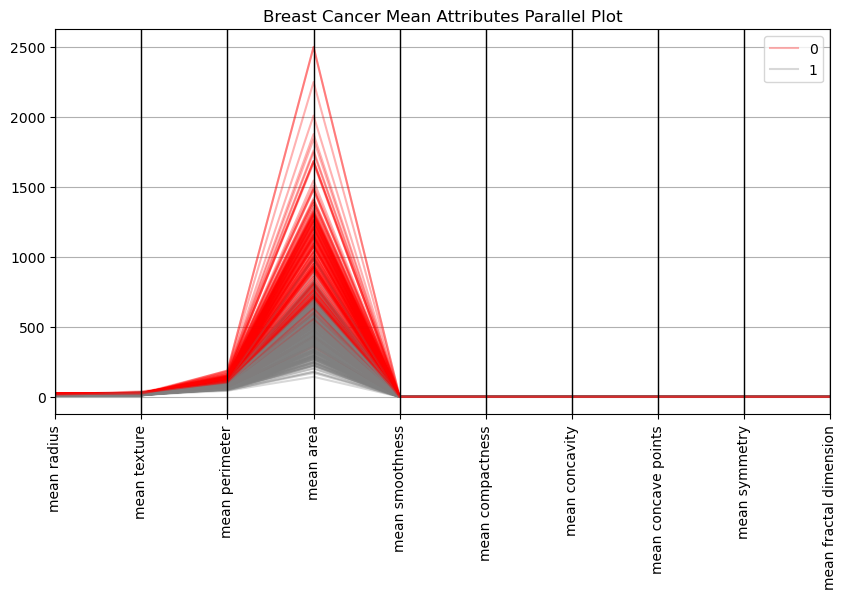

In [229]:
plt.style.use('default')
plt.rc('figure', figsize=(10.0, 5.0))
parallel_coordinates(data_mean, 'target',
                     color=['red', 'grey'],
                     alpha=0.3,)

plt.xticks(rotation=90)
plt.title("Breast Cancer Mean Attributes Parallel Plot")
plt.show()

In [230]:
data_focus1 = data_mean.drop(['mean area'], axis = 1)

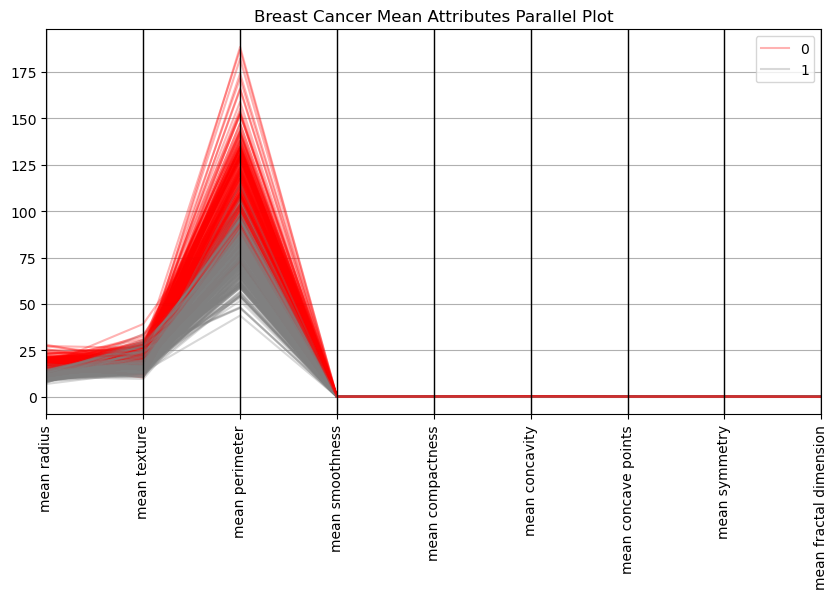

In [231]:
parallel_coordinates(data_focus1, 'target',
                     color=['red', 'grey'],
                     alpha=0.3,)

plt.xticks(rotation=90)
plt.title("Breast Cancer Mean Attributes Parallel Plot")
plt.show()

In [232]:
data_focus2 = data_focus1.drop(['mean radius', 'mean texture', 'mean perimeter'], axis = 1)

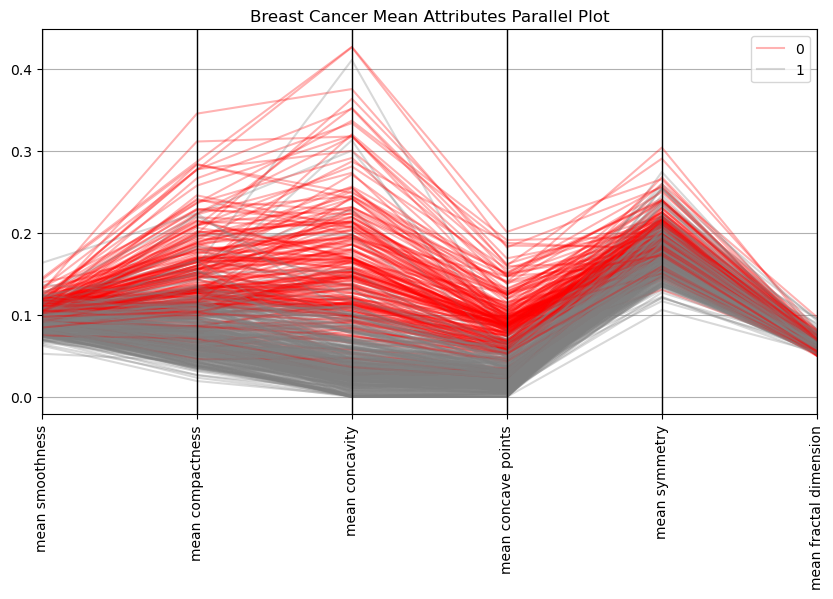

In [233]:
parallel_coordinates(data_focus2, 'target',
                     color=['red', 'grey'],
                     alpha=0.3,)

plt.xticks(rotation=90)
plt.title("Breast Cancer Mean Attributes Parallel Plot")
plt.show()

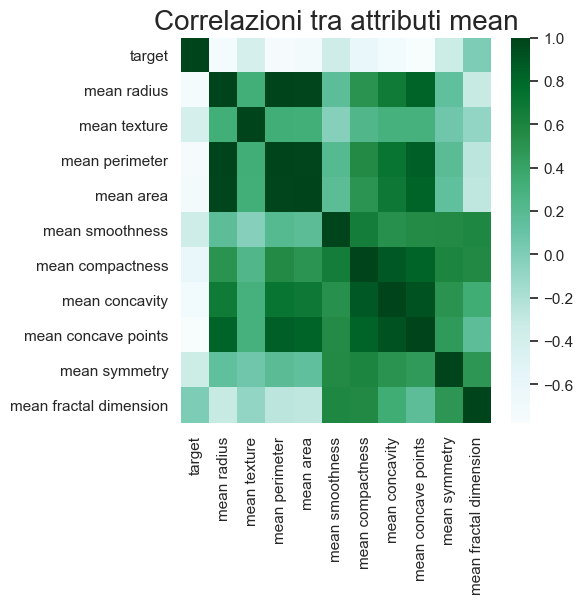

In [234]:
import seaborn as sns
import pandas as pd

#matrice di correlazione sul dataset con solo i mean

sns.set(rc={'figure.figsize':(5,5)})

sns.heatmap(data_mean.corr(), cmap='BuGn').set_title("Correlazioni tra attributi mean", size= 20)
plt.show()

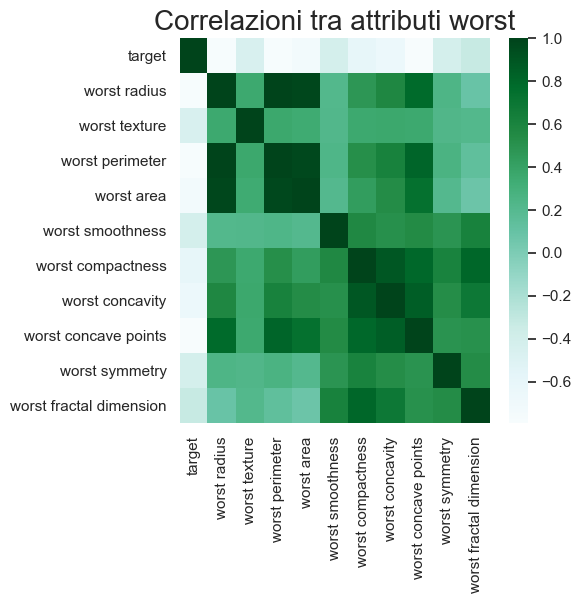

In [235]:
#matrice di correlazione sul dataset con solo i worst per vedere se ci sono delle differenze con quella mean

sns.heatmap(data_worst.corr(), cmap='BuGn').set_title("Correlazioni tra attributi worst", size= 20)
plt.show()

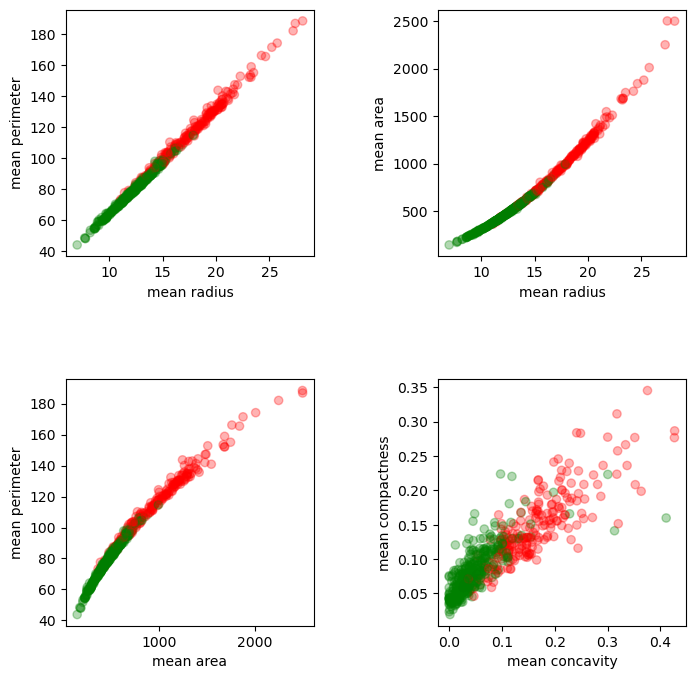

In [236]:
#small multiple di scatter plot tra attributi che risultano più correlati (mean)

plt.style.use('default')
fig , axs = plt.subplots( nrows=2, ncols=2, figsize= (8,8))

axs[0,0].scatter("mean radius", "mean perimeter", data=data_mean, c=cols, alpha=0.3)
axs[0,0].set_xlabel('mean radius')
axs[0,0].set_ylabel('mean perimeter')

axs[0,1].scatter("mean radius", "mean area", data=data_mean, c=cols, alpha=0.3)
axs[0,1].set_xlabel('mean radius')
axs[0,1].set_ylabel('mean area')

axs[1,0].scatter("mean area", "mean perimeter", data=data_mean, c=cols, alpha=0.3)
axs[1,0].set_xlabel('mean area')
axs[1,0].set_ylabel('mean perimeter')

axs[1,1].scatter("mean concavity", "mean compactness", data=data_mean, c=cols, alpha=0.3)
axs[1,1].set_xlabel('mean concavity')
axs[1,1].set_ylabel('mean compactness')

fig.subplots_adjust(wspace=0.5, hspace=0.5)

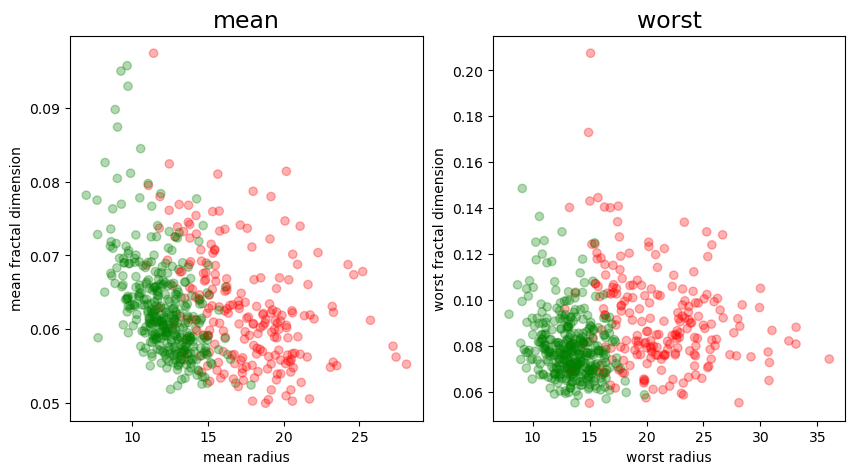

In [237]:
#comparazione tra coppie di attributi che risultano avere un grado di correlazione diversa
#nelle due matrici di correlazione (mean, worst)

plt.style.use('default')
fig , axs = plt.subplots( nrows=1, ncols=2, figsize= (10,5))

axs[0].scatter("mean radius", "mean fractal dimension", data=data_mean, c=cols, alpha=0.3)
axs[0].set_xlabel('mean radius')
axs[0].set_ylabel('mean fractal dimension')
axs[0].set_title('mean', size=17)

axs[1].scatter("worst radius", "worst fractal dimension", data=data_worst, c=cols, alpha=0.3)
axs[1].set_xlabel('worst radius')
axs[1].set_ylabel('worst fractal dimension')
axs[1].set_title('worst', size=17)

plt.show()

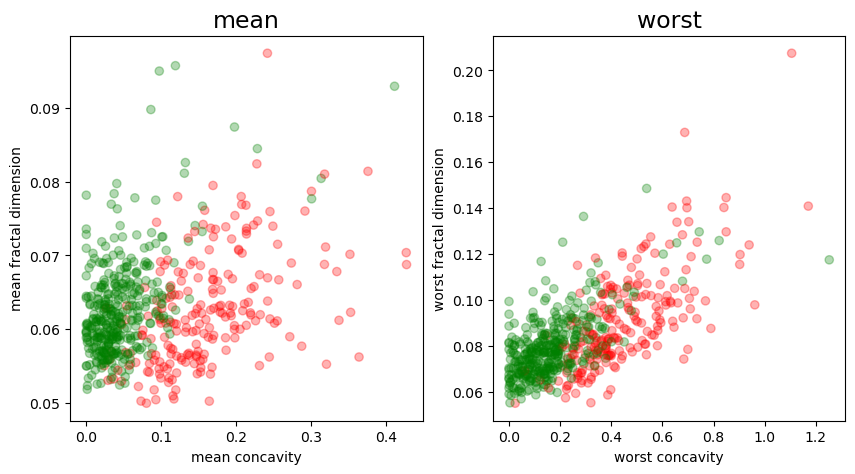

In [238]:
plt.style.use('default')
fig , axs = plt.subplots( nrows=1, ncols=2, figsize= (10,5))

axs[0].scatter("mean concavity", "mean fractal dimension", data=data_mean, c=cols, alpha=0.3)
axs[0].set_xlabel('mean concavity')
axs[0].set_ylabel('mean fractal dimension')
axs[0].set_title('mean', size=17)

axs[1].scatter("worst concavity", "worst fractal dimension", data=data_worst, c=cols, alpha=0.3)
axs[1].set_xlabel('worst concavity')
axs[1].set_ylabel('worst fractal dimension')
axs[1].set_title('worst', size=17)


plt.show()

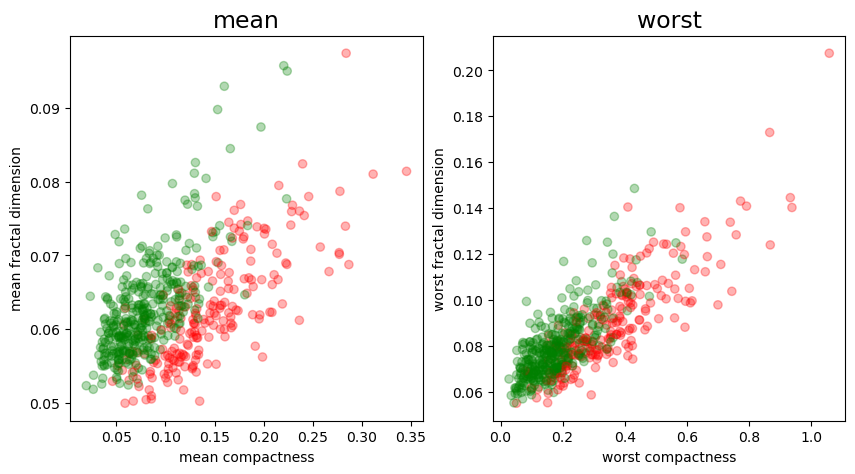

In [239]:
plt.style.use('default')
fig , axs = plt.subplots( nrows=1, ncols=2, figsize= (10,5))

axs[0].scatter("mean compactness", "mean fractal dimension", data=data_mean, c=cols, alpha=0.3)
axs[0].set_xlabel('mean compactness')
axs[0].set_ylabel('mean fractal dimension')
axs[0].set_title('mean', size=17)

axs[1].scatter("worst compactness", "worst fractal dimension", data=data_worst, c=cols, alpha=0.3)
axs[1].set_xlabel('worst compactness')
axs[1].set_ylabel('worst fractal dimension')
axs[1].set_title('worst', size=17)


plt.show()

In [240]:
data_mean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   target                  569 non-null    int64  
 1   mean radius             569 non-null    float64
 2   mean texture            569 non-null    float64
 3   mean perimeter          569 non-null    float64
 4   mean area               569 non-null    float64
 5   mean smoothness         569 non-null    float64
 6   mean compactness        569 non-null    float64
 7   mean concavity          569 non-null    float64
 8   mean concave points     569 non-null    float64
 9   mean symmetry           569 non-null    float64
 10  mean fractal dimension  569 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 53.3 KB


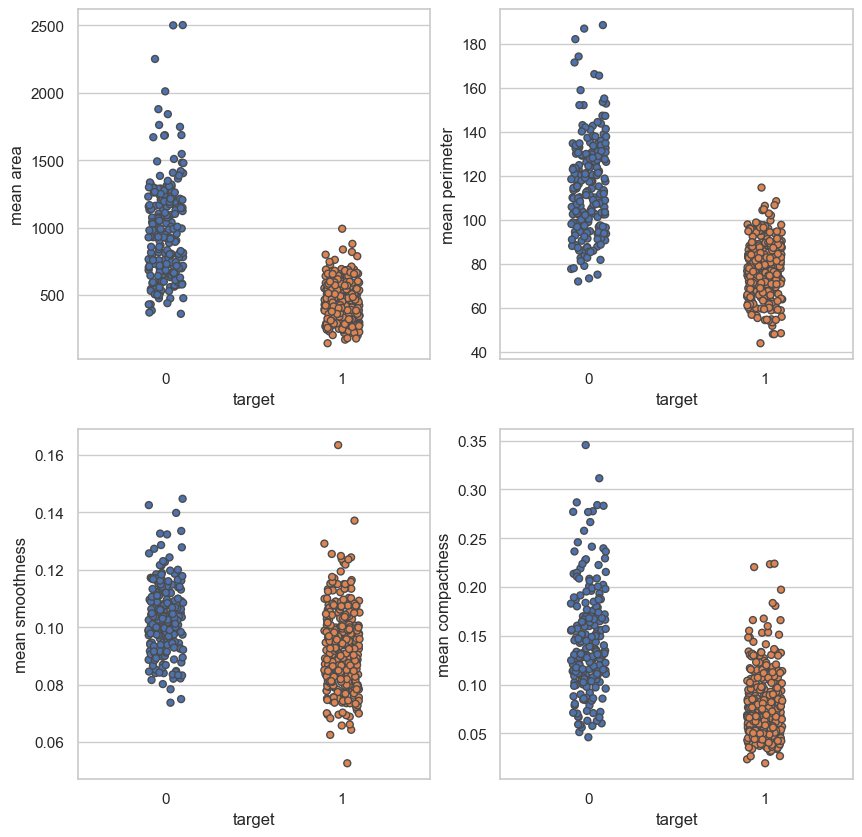

In [253]:
#prove per fare small multiple con seaborn
plt.rc('figure', figsize=(10.0, 10.0))
plt.subplot(2,2,1)
sns.set_theme(style="whitegrid")
sns.stripplot(x='target', y='mean area', data=data_mean, linewidth=1)


plt.subplot(2,2,2)
sns.set_theme(style="whitegrid")
sns.stripplot(x='target', y='mean perimeter', data=data_mean, linewidth=1)


plt.subplot(2,2,3)
sns.set_theme(style="whitegrid")
sns.stripplot(x='target', y='mean smoothness', data=data_mean, linewidth=1)


plt.subplot(2,2,4)
sns.set_theme(style="whitegrid")
sns.stripplot(x='target', y='mean compactness', data=data_mean, linewidth=1)

plt.show()

In [242]:
from sklearn import preprocessing
colms = data_mean.columns
scaler = preprocessing.MinMaxScaler() #creao uno scaler da applicare al dataset di default scala (0,1)
np_scaled = scaler.fit_transform(data_mean) #adatta ai dati e poi li trasforma (restituisce un array)
mean_norm = pd.DataFrame(np_scaled, columns = colms) #riporto i dati alla forma di dataframe
mean_norm

target  mean radius  mean texture  mean perimeter  mean area  \
0       0.0     0.521037      0.022658        0.545989   0.363733   
1       0.0     0.643144      0.272574        0.615783   0.501591   
2       0.0     0.601496      0.390260        0.595743   0.449417   
3       0.0     0.210090      0.360839        0.233501   0.102906   
4       0.0     0.629893      0.156578        0.630986   0.489290   
..      ...          ...           ...             ...        ...   
564     0.0     0.690000      0.428813        0.678668   0.566490   
565     0.0     0.622320      0.626987        0.604036   0.474019   
566     0.0     0.455251      0.621238        0.445788   0.303118   
567     0.0     0.644564      0.663510        0.665538   0.475716   
568     1.0     0.036869      0.501522        0.028540   0.015907   

     mean smoothness  mean compactness  mean concavity  mean concave points  \
0           0.593753          0.792037        0.703140             0.731113   
1           0.289880          0.181768        0.203608             0.348757   
2           0.514309          0.431017        0.462512             0.635686   
3           0.811321          0.811361        0.565604             0.522863   
4           0.430351          0.347893        0.463918             0.518390   
..               ...               ...             ...                  ...   
564         0.526948          0.296055        0.571462             0.690358   
565         0.407782          0.257714        0.337395             0.486630   
566         0.288165          0.254340        0.216753             0.263519   
567         0.588336          0.790197        0.823336             0.755467   
568         0.000000          0.074351        0.000000             0.000000   

     mean symmetry  mean fractal dimension  
0         0.686364                0.605518  
1         0.379798                0.141323  
2         0.509596                0.211247  
3         0.776263                1.000000  
4         0.378283                0.186816  
..             ...                     ...  
564       0.336364                0.132056  
565       0.349495                0.113100  
566       0.267677                0.137321  
567       0.675253                0.425442  
568       0.266162                0.187026  

[569 rows x 11 columns]

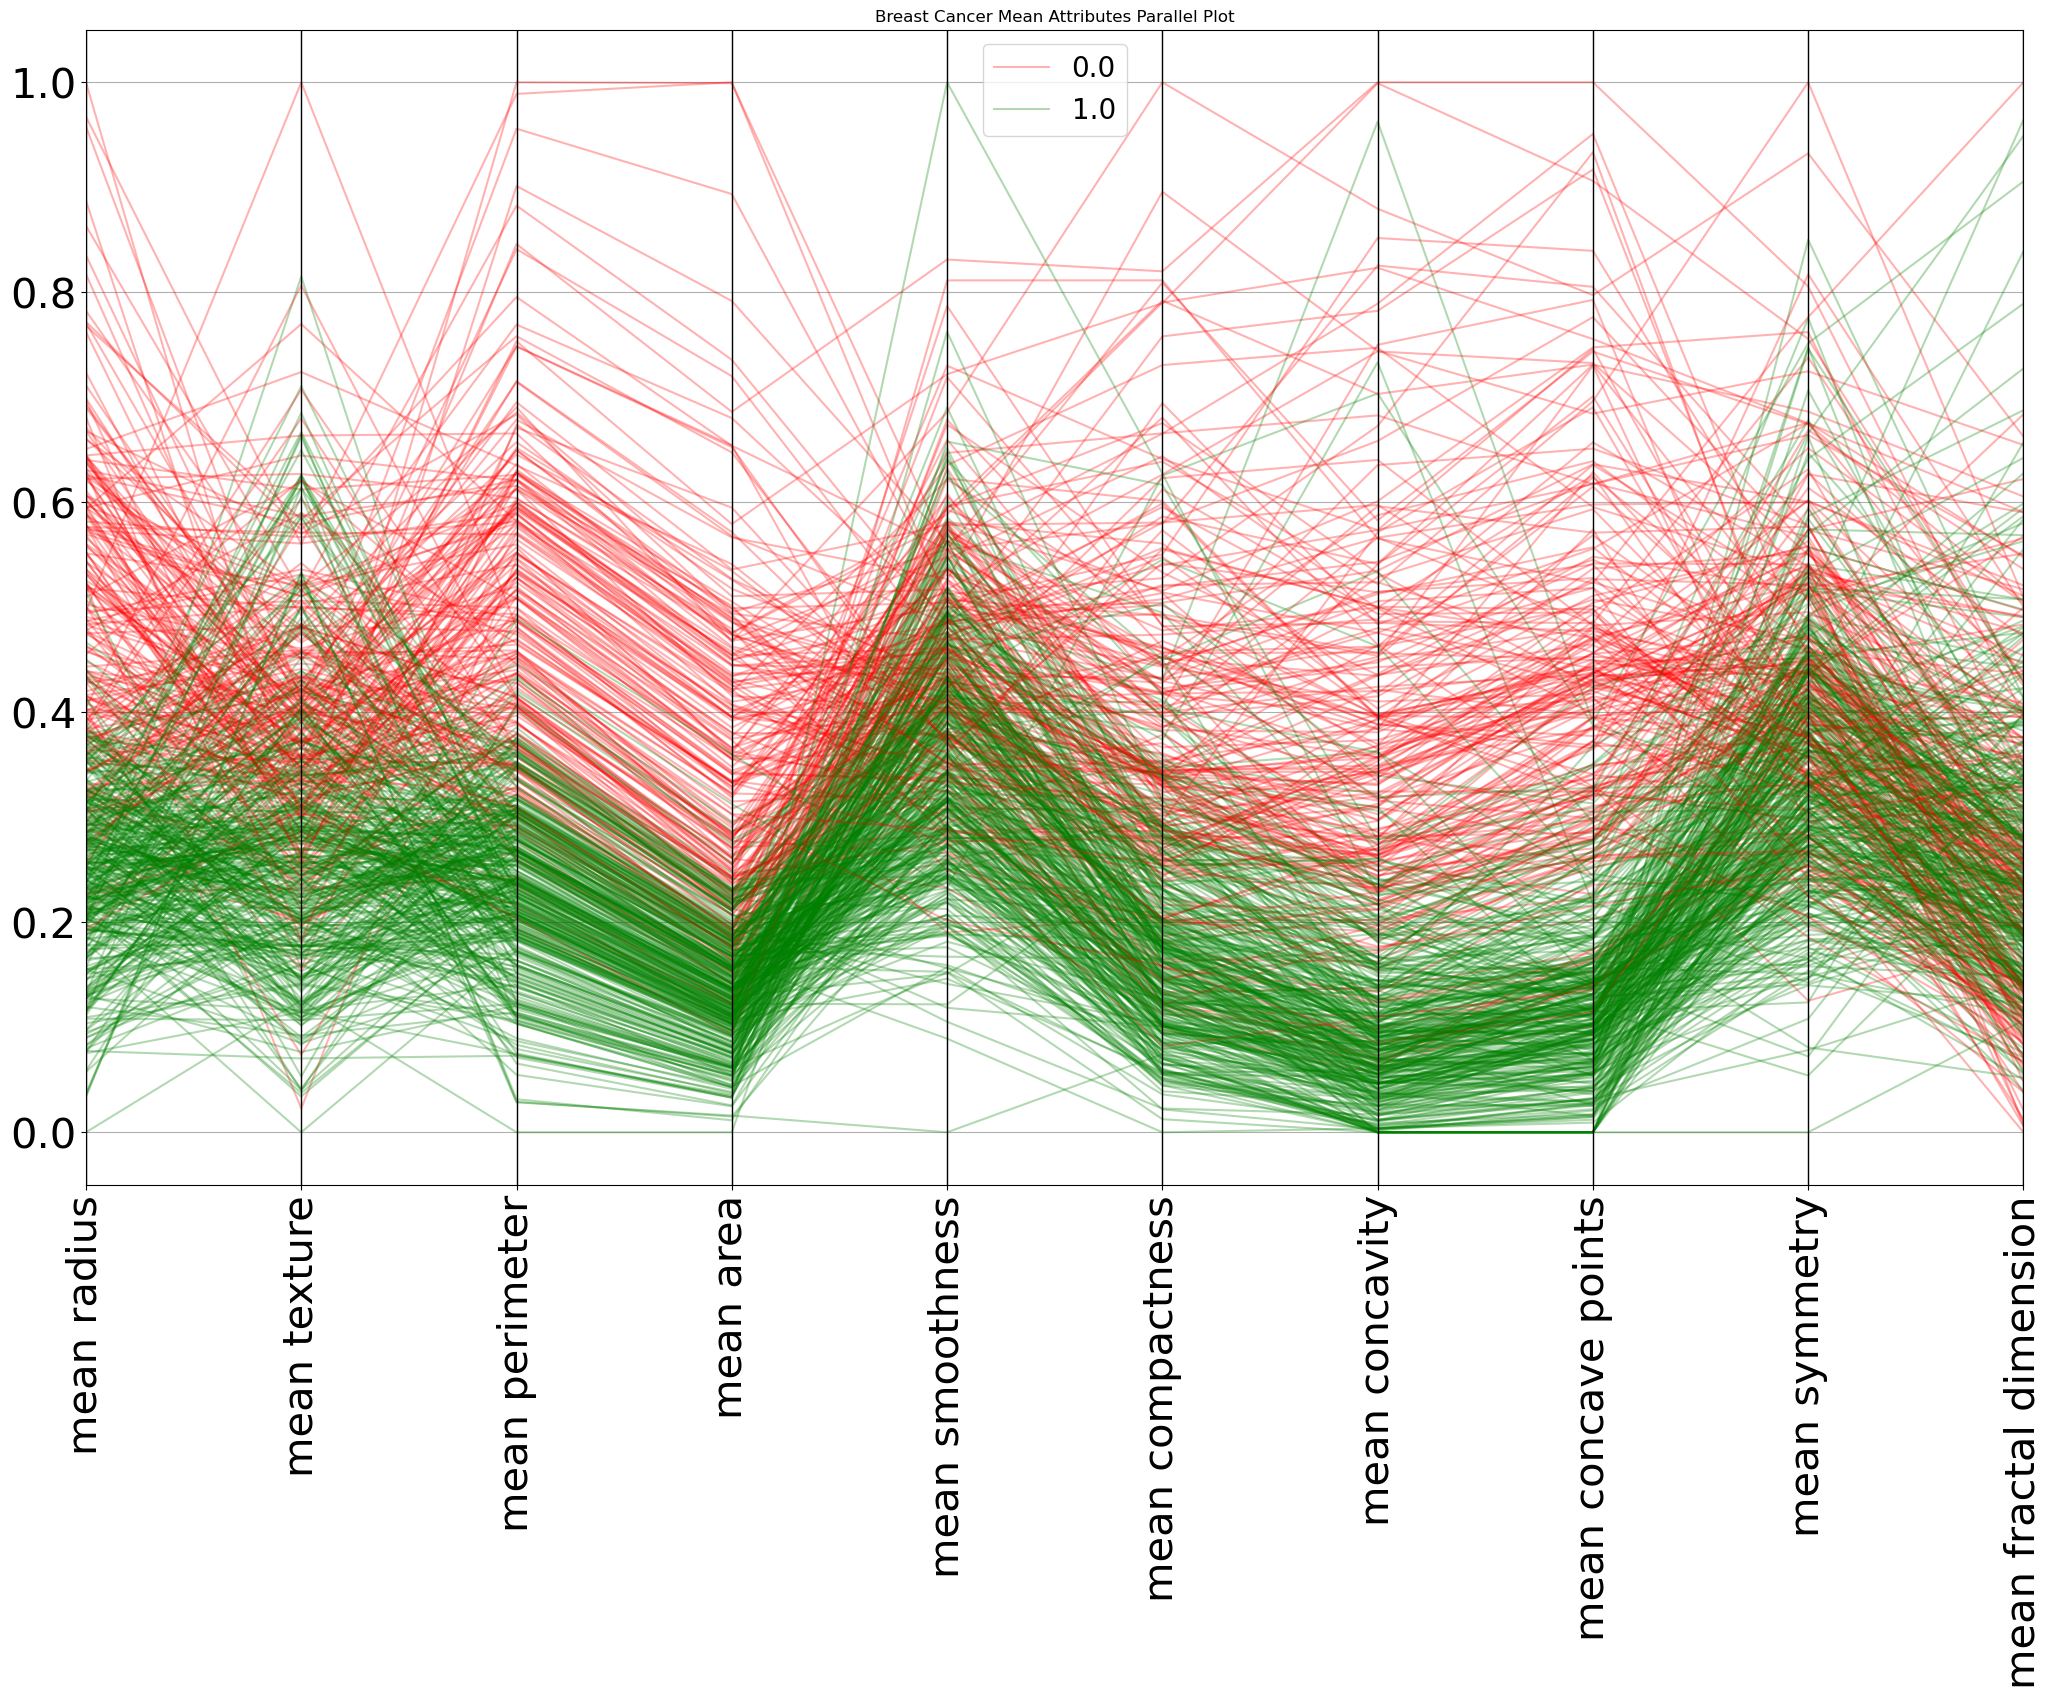

In [243]:
plt.style.use('default')
plt.rc('figure', figsize=(25.0, 15.0))
parallel_coordinates(mean_norm, 'target',
                     color=['red', 'green'],
                     alpha=0.3,)

plt.xticks(rotation=90)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend(fontsize=20)
plt.title("Breast Cancer Mean Attributes Parallel Plot")
plt.show()

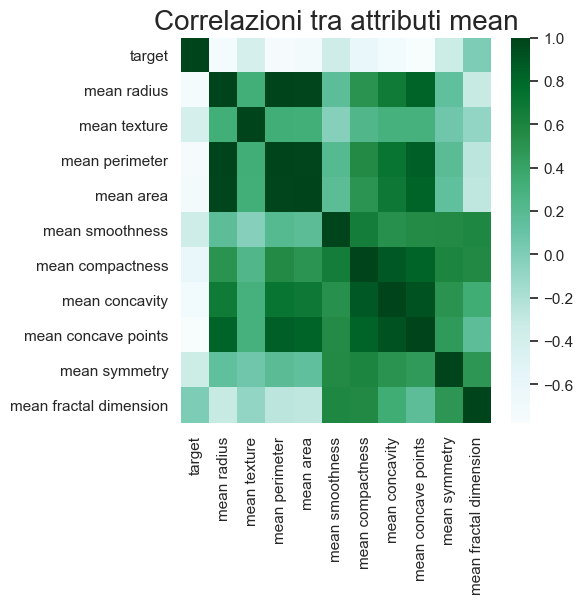

In [244]:
sns.set(rc={'figure.figsize':(5,5)})

sns.heatmap(mean_norm.corr(), cmap='BuGn').set_title("Correlazioni tra attributi mean", size= 20)
plt.show()

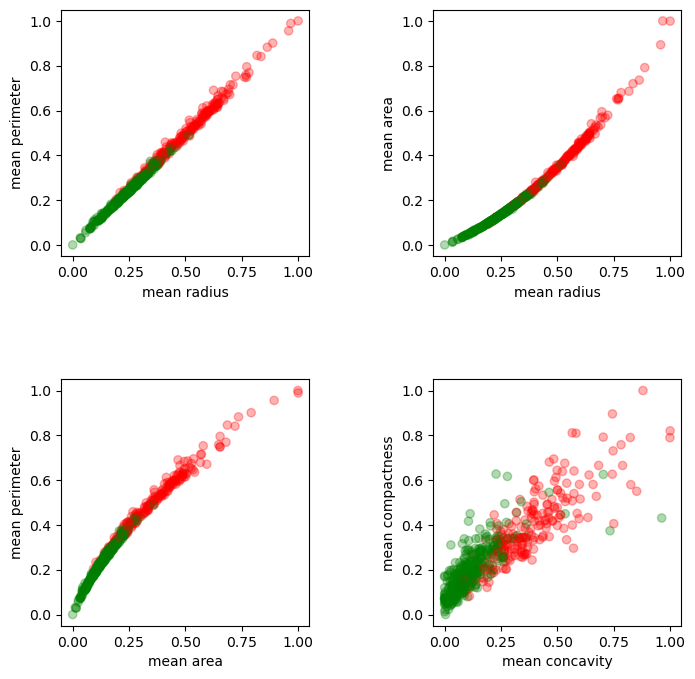

In [245]:
plt.style.use('default')
fig , axs = plt.subplots( nrows=2, ncols=2, figsize= (8,8))

axs[0,0].scatter("mean radius", "mean perimeter", data=mean_norm, c=cols, alpha=0.3)
axs[0,0].set_xlabel('mean radius')
axs[0,0].set_ylabel('mean perimeter')

axs[0,1].scatter("mean radius", "mean area", data=mean_norm, c=cols, alpha=0.3)
axs[0,1].set_xlabel('mean radius')
axs[0,1].set_ylabel('mean area')

axs[1,0].scatter("mean area", "mean perimeter", data=mean_norm, c=cols, alpha=0.3)
axs[1,0].set_xlabel('mean area')
axs[1,0].set_ylabel('mean perimeter')

axs[1,1].scatter("mean concavity", "mean compactness", data=mean_norm, c=cols, alpha=0.3)
axs[1,1].set_xlabel('mean concavity')
axs[1,1].set_ylabel('mean compactness')

fig.subplots_adjust(wspace=0.5, hspace=0.5)

In [246]:
from sklearn import preprocessing

colms = data_worst.columns
scaler = preprocessing.MinMaxScaler()
np_scaled = scaler.fit_transform(data_worst)
worst_norm = pd.DataFrame(np_scaled, columns = colms)
worst_norm

target  worst radius  worst texture  worst perimeter  worst area  \
0       0.0      0.620776       0.141525         0.668310    0.450698   
1       0.0      0.606901       0.303571         0.539818    0.435214   
2       0.0      0.556386       0.360075         0.508442    0.374508   
3       0.0      0.248310       0.385928         0.241347    0.094008   
4       0.0      0.519744       0.123934         0.506948    0.341575   
..      ...           ...            ...              ...         ...   
564     0.0      0.623266       0.383262         0.576174    0.452664   
565     0.0      0.560655       0.699094         0.520892    0.379915   
566     0.0      0.393099       0.589019         0.379949    0.230731   
567     0.0      0.633582       0.730277         0.668310    0.402035   
568     1.0      0.054287       0.489072         0.043578    0.020497   

     worst smoothness  worst compactness  worst concavity  \
0            0.601136           0.619292         0.568610   
1            0.347553           0.154563         0.192971   
2            0.483590           0.385375         0.359744   
3            0.915472           0.814012         0.548642   
4            0.437364           0.172415         0.319489   
..                ...                ...              ...   
564          0.461137           0.178527         0.328035   
565          0.300007           0.159997         0.256789   
566          0.282177           0.273705         0.271805   
567          0.619626           0.815758         0.749760   
568          0.124084           0.036043         0.000000   

     worst concave points  worst symmetry  worst fractal dimension  
0                0.912027        0.598462                 0.418864  
1                0.639175        0.233590                 0.222878  
2                0.835052        0.403706                 0.213433  
3                0.884880        1.000000                 0.773711  
4                0.558419        0.157500                 0.142595  
..                    ...             ...                      ...  
564              0.761512        0.097575                 0.105667  
565              0.559450        0.198502                 0.074315  
566              0.487285        0.128721                 0.151909  
567              0.910653        0.497142                 0.452315  
568              0.000000        0.257441                 0.100682  

[569 rows x 11 columns]

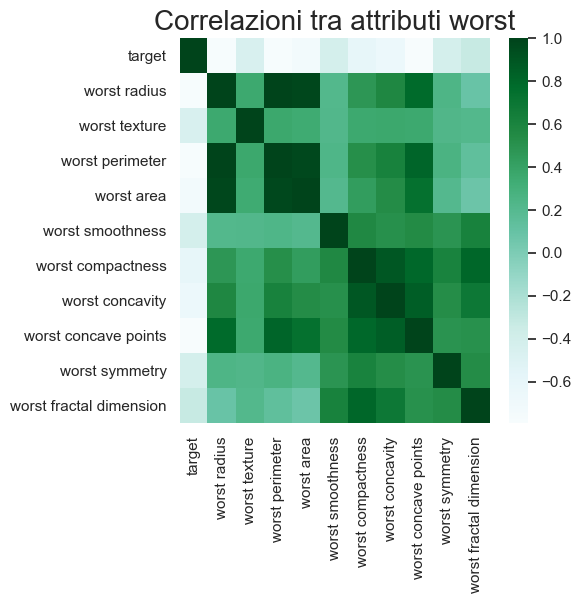

In [247]:
#matrice di correlazione sul dataset con solo i worst per vedere se ci sono delle differenze con quella mean
sns.set(rc={'figure.figsize':(5,5)})

sns.heatmap(worst_norm.corr(), cmap='BuGn').set_title("Correlazioni tra attributi worst", size= 20)
plt.show()

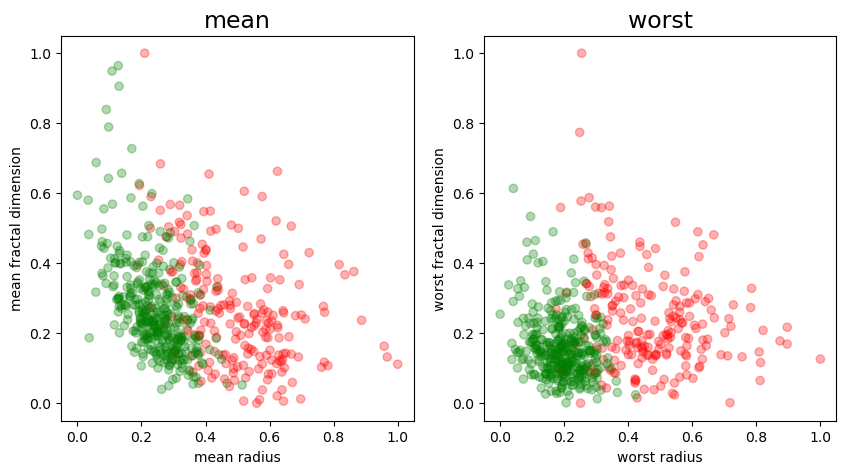

In [248]:
#comparazione tra coppie di attributi che risultano avere un grado di correlazione diversa
#nelle due matrici di correlazione (mean, worst)

plt.style.use('default')
fig , axs = plt.subplots( nrows=1, ncols=2, figsize= (10,5))

axs[0].scatter("mean radius", "mean fractal dimension", data=mean_norm, c=cols, alpha=0.3)
axs[0].set_xlabel('mean radius')
axs[0].set_ylabel('mean fractal dimension')
axs[0].set_title('mean', size=17)

axs[1].scatter("worst radius", "worst fractal dimension", data=worst_norm, c=cols, alpha=0.3)
axs[1].set_xlabel('worst radius')
axs[1].set_ylabel('worst fractal dimension')
axs[1].set_title('worst', size=17)

plt.show()

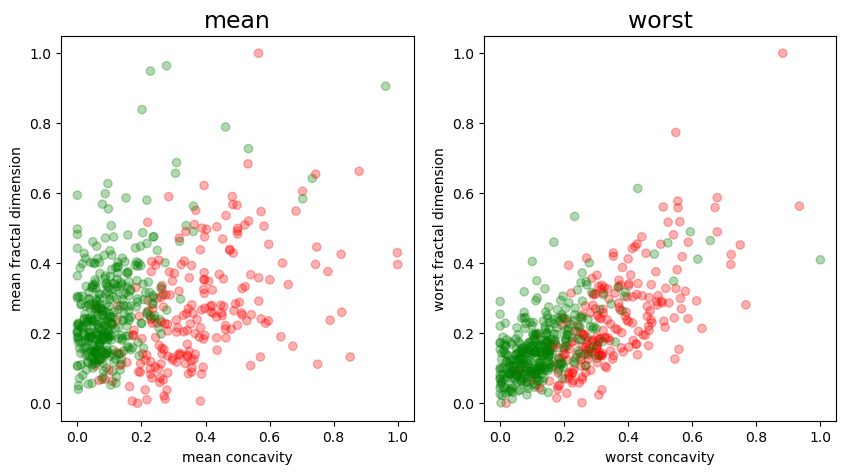

In [249]:
plt.style.use('default')
fig , axs = plt.subplots( nrows=1, ncols=2, figsize= (10,5))

axs[0].scatter("mean concavity", "mean fractal dimension", data=mean_norm, c=cols, alpha=0.3)
axs[0].set_xlabel('mean concavity')
axs[0].set_ylabel('mean fractal dimension')
axs[0].set_title('mean', size=17)

axs[1].scatter("worst concavity", "worst fractal dimension", data=worst_norm, c=cols, alpha=0.3)
axs[1].set_xlabel('worst concavity')
axs[1].set_ylabel('worst fractal dimension')
axs[1].set_title('worst', size=17)


plt.show()

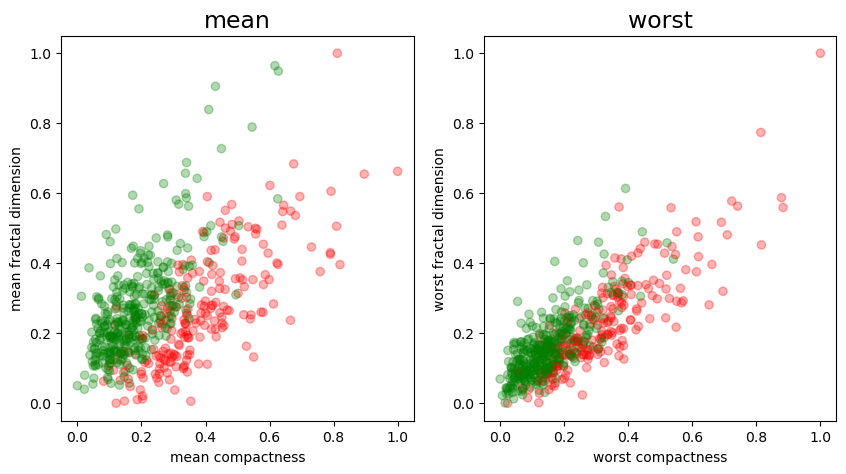

In [250]:
plt.style.use('default')
fig , axs = plt.subplots( nrows=1, ncols=2, figsize= (10,5))

axs[0].scatter("mean compactness", "mean fractal dimension", data=mean_norm, c=cols, alpha=0.3)
axs[0].set_xlabel('mean compactness')
axs[0].set_ylabel('mean fractal dimension')
axs[0].set_title('mean', size=17)

axs[1].scatter("worst compactness", "worst fractal dimension", data=worst_norm, c=cols, alpha=0.3)
axs[1].set_xlabel('worst compactness')
axs[1].set_ylabel('worst fractal dimension')
axs[1].set_title('worst', size=17)


plt.show()